## importing libraries and reading of train data

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn regex

In [25]:
import pandas as pd
import numpy as np
import re

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
real_df = pd.read_csv(r'C:\Users\DinAnsh\Desktop\learn-ML\SSP\Train.csv')
df = real_df.copy()
display(df.info(), df.head(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [27]:
df.shape, df.dropna().shape

((8523, 12), (4650, 12))

In [28]:
for col in df.columns:
    print(col, list(df[col].isna()).count(True))

Item_Identifier 0
Item_Weight 1463
Item_Fat_Content 0
Item_Visibility 0
Item_Type 0
Item_MRP 0
Outlet_Identifier 0
Outlet_Establishment_Year 0
Outlet_Size 2410
Outlet_Location_Type 0
Outlet_Type 0
Item_Outlet_Sales 0


## handling null values

In [30]:
# item_weight is depending upon item_type

d1 = df.groupby('Item_Type').mean()
d1 = dict(zip(d1.index.to_list(), d1['Item_Weight'].to_list()))

null_df1 = df[df['Item_Weight'].isna()==True]
#display(null_df1)

itm_wt = []
for typ in null_df1['Item_Type']:
    itm_wt += [d1[typ]]

c=0
for i in null_df1.index:
    df.loc[i, 'Item_Weight'] = itm_wt[c]
    c+=1

display(df)


#df['Item_Weight'].isna().to_list().count(True)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [38]:
df.groupby(by=['Outlet_Type','Outlet_Size','Outlet_Location_Type']).count()

Item_Identifier  \
Outlet_Type       Outlet_Size Outlet_Location_Type                    
Grocery Store     Small       Tier 1                            528   
Supermarket Type1 High        Tier 3                            932   
                  Medium      Tier 1                            930   
                  Small       Tier 1                            930   
                              Tier 2                            930   
Supermarket Type2 Medium      Tier 3                            928   
Supermarket Type3 Medium      Tier 3                            935   

                                                    Item_Weight  \
Outlet_Type       Outlet_Size Outlet_Location_Type                
Grocery Store     Small       Tier 1                        528   
Supermarket Type1 High        Tier 3                        932   
                  Medium      Tier 1                        930   
                  Small       Tier 1                        930   
                              Tier 2                        930   
Supermarket Type2 Medium      Tier 3                        928   
Supermarket Type3 Medium      Tier 3                        935   

                                                    Item_Fat_Content  \
Outlet_Type       Outlet_Size Outlet_Location_Type                     
Grocery Store     Small       Tier 1                             528   
Supermarket Type1 High        Tier 3                             932   
                  Medium      Tier 1                             930   
                  Small       Tier 1                             930   
                              Tier 2                             930   
Supermarket Type2 Medium      Tier 3                             928   
Supermarket Type3 Medium      Tier 3                             935   

                                                    Item_Visibility  \
Outlet_Type       Outlet_Size Outlet_Location_Type                    
Grocery Store     Small       Tier 1                            528   
Supermarket Type1 High        Tier 3                            932   
                  Medium      Tier 1                            930   
                  Small       Tier 1                            930   
                              Tier 2                            930   
Supermarket Type2 Medium      Tier 3                            928   
Supermarket Type3 Medium      Tier 3                            935   

                                                    Item_Type  Item_MRP  \
Outlet_Type       Outlet_Size Outlet_Location_Type                        
Grocery Store     Small       Tier 1                      528       528   
Supermarket Type1 High        Tier 3                      932       932   
                  Medium      Tier 1                      930       930   
                  Small       Tier 1                      930       930   
                              Tier 2                      930       930   
Supermarket Type2 Medium      Tier 3                      928       928   
Supermarket Type3 Medium      Tier 3                      935       935   

                                                    Outlet_Identifier  \
Outlet_Type       Outlet_Size Outlet_Location_Type                      
Grocery Store     Small       Tier 1                              528   
Supermarket Type1 High        Tier 3                              932   
                  Medium      Tier 1                              930   
                  Small       Tier 1                              930   
                              Tier 2                              930   
Supermarket Type2 Medium      Tier 3                              928   
Supermarket Type3 Medium      Tier 3                              935   

                                                    Outlet_Establishment_Year  \
Outlet_Type       Outlet_Size Outlet_Location_Type                              
Grocery Store     Small

In [44]:
# Outlet_Size is depending upon Outlet_type

null_df2 = df[df['Outlet_Size'].isna()==True]

null_df2[null_df2['Outlet_Type']=='Supermarket Type1']
#null_df2
df[df['Outlet_Location_Type']=='Tier 3']
#df.groupby() # and (df['Outlet_Location_Type']==)]

#{'Grocery Store':'Small', 'Supermarket Type1':'...'}

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
...,...,...,...,...,...,...,...,...,...,...,...,...
8512,FDR26,20.700,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834


In [ ]:
d2 = {'Grocery Store':'Small'}

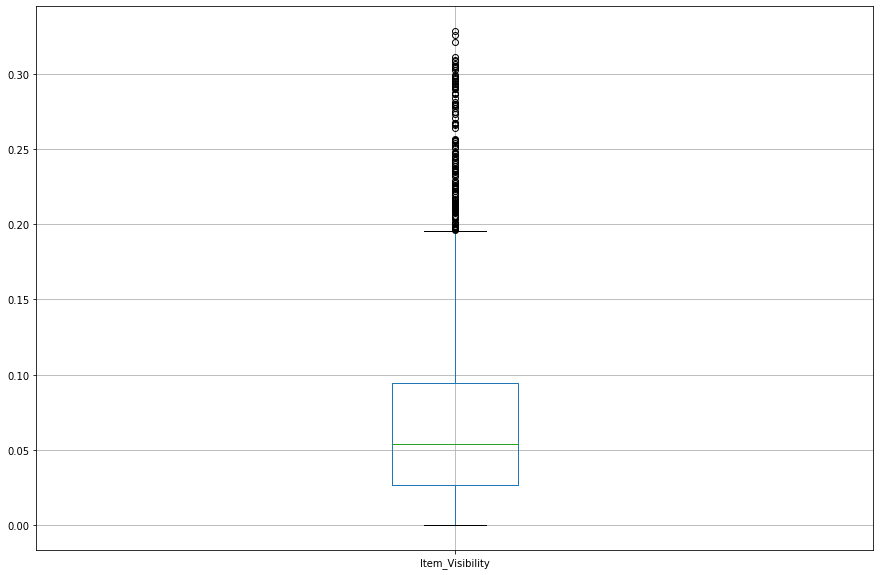

In [46]:
df.boxplot(['Item_Visibility'], figsize=(15,10)); 